# Defining and Training SLP

In [430]:
import numpy as np
import matplotlib.pyplot as plt 
import os
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.callbacks import EarlyStopping
metrics = {}

In [432]:
def get_imageset(datadir):
    
    #converts the given images into numpy arrays that can be feeded into the perceptron
    images = sorted([img_name for img_name in os.listdir(datadir) if img_name!=".DS_Store"])
    matrix = np.array([np.array(Image.open(datadir+each_img).convert('L')) for each_img in images])
    matrix = np.where(matrix<np.mean(matrix),0,1).astype('float64')
    return matrix

In [433]:
X_train = get_imageset("../dataset/train/")
X_test = get_imageset("../dataset/test/")

print(X_train.shape,X_test.shape,X_test.dtype,X_train.dtype)

(10, 16, 16) (20, 16, 16) float64 float64


In [482]:
#Flattening the input data
X_train= X_train.reshape(X_train.shape[0],1,256)
X_test = X_test.reshape(X_test.shape[0],1,256)

# Perceptron Model Definition

In [573]:
# Fully connected input layer with 256*256 weights
# Number of bias: 256
# Number of Output Nodes: 256

model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(1,256)))
model.add(Dense(256, activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam')
# Diplay the model summary
print("model summary")
model.summary()
print("Shapes of weights and bias arrays")
for x in range(0,len(model.layers) - 1):
    print(model.get_layer(index=x+1).get_weights()[0].shape)
    print(model.get_layer(index=x+1).get_weights()[1].shape)
earlystopper = EarlyStopping(monitor='val_loss', mode='min',patience=2) 

model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1, 256)            65792     
_________________________________________________________________
dense_38 (Dense)             (None, 1, 256)            65792     
Total params: 131,584
Trainable params: 131,584
Non-trainable params: 0
_________________________________________________________________
Shapes of weights and bias arrays
(256, 256)
(256,)


In [489]:
#Training the model
results = model.fit(X_train,X_train, validation_split=0.1, epochs=350)

Train on 9 samples, validate on 1 samples
Epoch 1/350
9/9 [==============================] - 2s 187ms/step - loss: 0.2660 - val_loss: 0.2486
Epoch 2/350
9/9 [==============================] - 0s 1ms/step - loss: 0.2459 - val_loss: 0.2350
Epoch 3/350
9/9 [==============================] - 0s 1ms/step - loss: 0.2282 - val_loss: 0.2235
Epoch 4/350
9/9 [==============================] - 0s 1ms/step - loss: 0.2127 - val_loss: 0.2139
Epoch 5/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1995 - val_loss: 0.2062
Epoch 6/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1883 - val_loss: 0.2002
Epoch 7/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1789 - val_loss: 0.1955
Epoch 8/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1713 - val_loss: 0.1921
Epoch 9/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1650 - val_loss: 0.1897
Epoch 10/350
9/9 [==============================] - 0s 1ms/step - loss: 0.1600 - va

Epoch 85/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0368 - val_loss: 0.1327
Epoch 86/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0358 - val_loss: 0.1324
Epoch 87/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0348 - val_loss: 0.1321
Epoch 88/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0339 - val_loss: 0.1318
Epoch 89/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0329 - val_loss: 0.1315
Epoch 90/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.1313
Epoch 91/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0312 - val_loss: 0.1310
Epoch 92/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.1308
Epoch 93/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0295 - val_loss: 0.1306
Epoch 94/350
9/9 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.1304
Epoch 95/350
9/9 [==

Epoch 168/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.1313
Epoch 169/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.1314
Epoch 170/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0052 - val_loss: 0.1314
Epoch 171/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0051 - val_loss: 0.1315
Epoch 172/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.1315
Epoch 173/350
9/9 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.1315
Epoch 174/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.1316
Epoch 175/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.1316
Epoch 176/350
9/9 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.1317
Epoch 177/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.1317
Epoch 178/

Epoch 251/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.1346
Epoch 252/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.1346
Epoch 253/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1347
Epoch 254/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1347
Epoch 255/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1347
Epoch 256/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1348
Epoch 257/350
9/9 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.1348
Epoch 258/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.1348
Epoch 259/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.1348
Epoch 260/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.1349
Epoch 261/

Epoch 334/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.1369
Epoch 335/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1369
Epoch 336/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1370
Epoch 337/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1370
Epoch 338/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1370
Epoch 339/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1370
Epoch 340/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1371
Epoch 341/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1371
Epoch 342/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1371
Epoch 343/350
9/9 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.1371
Epoch 344/

In [490]:
#predicting the output for given imageset
y_pred = model.predict(X_test)

In [491]:
# Saving the model
model.save("Trained_10_img.h5")

In [492]:
def compare_results(xt,yp):
    """
    xt: Dataset Images
    yp: Predicted Images
    comparing image dataset against the predictions given by the output
    """
    for i in range(0,xt.shape[0]):
        f = plt.figure()
        x = 1
        f.add_subplot(x,2, 1)
        plt.imshow(xt[i].reshape(16,16),cmap="gray")
        plt.title('Original Dataset Image')
        f.add_subplot(x,2, 2)
        plt.imshow(yp[i].reshape(16,16),cmap="gray")
        plt.title('SLP Predicted Image')

## Test results for SLP trained on 10 images

(20, 1, 256) (20, 1, 256)


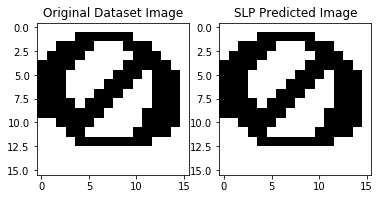

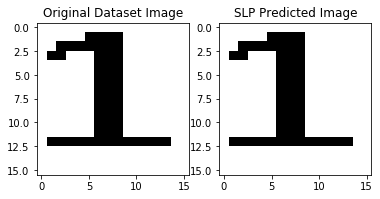

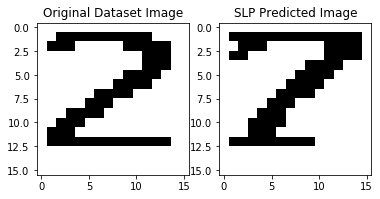

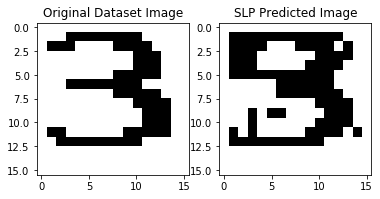

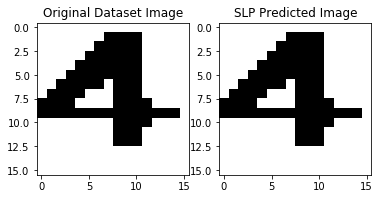

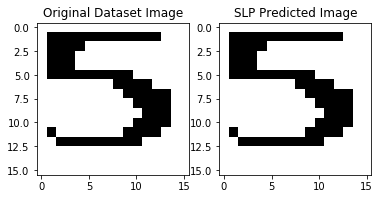

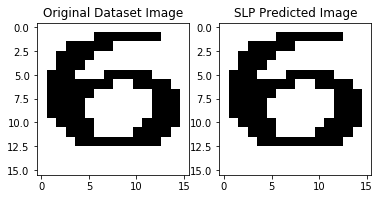

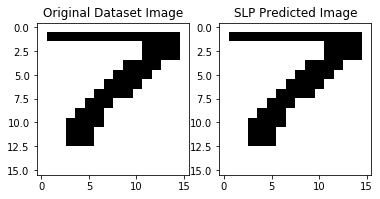

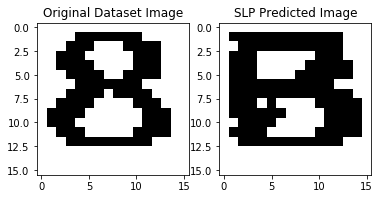

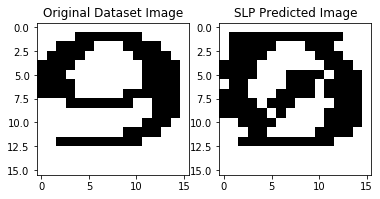

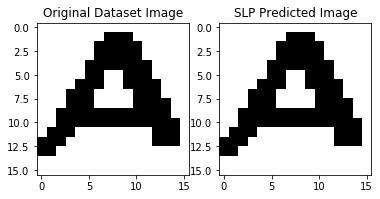

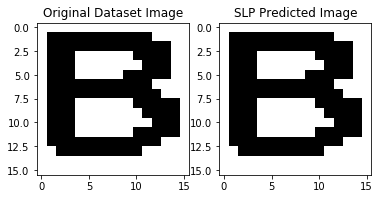

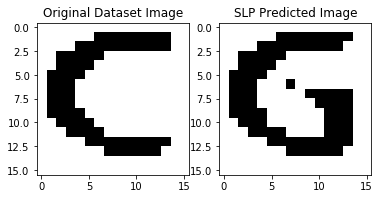

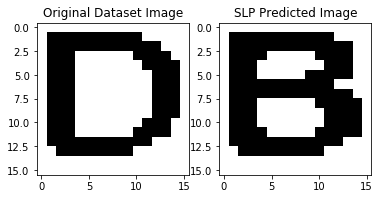

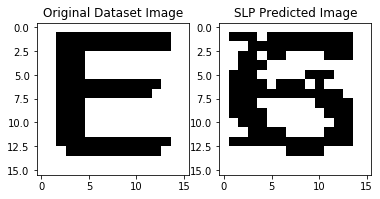

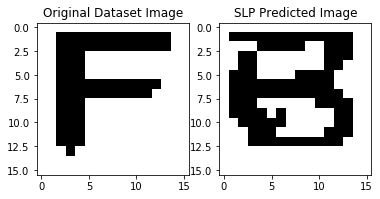

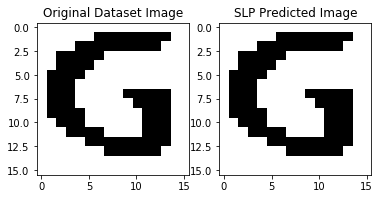

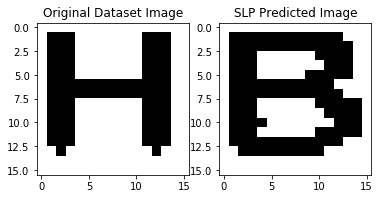

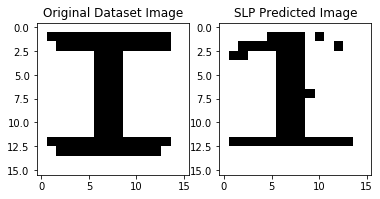

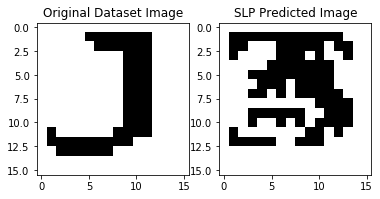

In [505]:
"""
converting the imageset into pure black and white images
the threshold value is the mean of all the pixels in the image
"""
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_test = np.where(X_test<np.mean(X_test),0,1).astype('float64')
print(X_test.shape,y_pred.shape)

compare_results(X_test,y_pred)


## Training the SLP on the entire dataset

In [528]:
#training the model
results = model.fit(X_test,X_test, validation_split=0.1, epochs=350)

Train on 18 samples, validate on 2 samples
Epoch 1/350
18/18 [==============================] - 2s 95ms/step - loss: 0.2742 - val_loss: 0.2501
Epoch 2/350
18/18 [==============================] - 0s 599us/step - loss: 0.2515 - val_loss: 0.2361
Epoch 3/350
18/18 [==============================] - 0s 769us/step - loss: 0.2317 - val_loss: 0.2245
Epoch 4/350
18/18 [==============================] - 0s 764us/step - loss: 0.2147 - val_loss: 0.2151
Epoch 5/350
18/18 [==============================] - 0s 774us/step - loss: 0.2003 - val_loss: 0.2075
Epoch 6/350
18/18 [==============================] - 0s 779us/step - loss: 0.1882 - val_loss: 0.2016
Epoch 7/350
18/18 [==============================] - 0s 781us/step - loss: 0.1782 - val_loss: 0.1971
Epoch 8/350
18/18 [==============================] - 0s 729us/step - loss: 0.1700 - val_loss: 0.1939
Epoch 9/350
18/18 [==============================] - 0s 672us/step - loss: 0.1634 - val_loss: 0.1917
Epoch 10/350
18/18 [=============================

Epoch 81/350
18/18 [==============================] - 0s 703us/step - loss: 0.0677 - val_loss: 0.1257
Epoch 82/350
18/18 [==============================] - 0s 651us/step - loss: 0.0667 - val_loss: 0.1252
Epoch 83/350
18/18 [==============================] - 0s 692us/step - loss: 0.0658 - val_loss: 0.1246
Epoch 84/350
18/18 [==============================] - 0s 1ms/step - loss: 0.0648 - val_loss: 0.1240
Epoch 85/350
18/18 [==============================] - 0s 601us/step - loss: 0.0639 - val_loss: 0.1235
Epoch 86/350
18/18 [==============================] - 0s 623us/step - loss: 0.0630 - val_loss: 0.1229
Epoch 87/350
18/18 [==============================] - 0s 600us/step - loss: 0.0620 - val_loss: 0.1224
Epoch 88/350
18/18 [==============================] - 0s 620us/step - loss: 0.0611 - val_loss: 0.1218
Epoch 89/350
18/18 [==============================] - 0s 631us/step - loss: 0.0603 - val_loss: 0.1213
Epoch 90/350
18/18 [==============================] - 0s 639us/step - loss: 0.0594 -

Epoch 161/350
18/18 [==============================] - 0s 710us/step - loss: 0.0208 - val_loss: 0.0970
Epoch 162/350
18/18 [==============================] - 0s 727us/step - loss: 0.0205 - val_loss: 0.0968
Epoch 163/350
18/18 [==============================] - 0s 724us/step - loss: 0.0202 - val_loss: 0.0967
Epoch 164/350
18/18 [==============================] - 0s 717us/step - loss: 0.0200 - val_loss: 0.0965
Epoch 165/350
18/18 [==============================] - 0s 724us/step - loss: 0.0197 - val_loss: 0.0964
Epoch 166/350
18/18 [==============================] - 0s 741us/step - loss: 0.0194 - val_loss: 0.0963
Epoch 167/350
18/18 [==============================] - 0s 679us/step - loss: 0.0191 - val_loss: 0.0961
Epoch 168/350
18/18 [==============================] - 0s 714us/step - loss: 0.0188 - val_loss: 0.0960
Epoch 169/350
18/18 [==============================] - 0s 679us/step - loss: 0.0186 - val_loss: 0.0959
Epoch 170/350
18/18 [==============================] - 0s 699us/step - lo

Epoch 241/350
18/18 [==============================] - 0s 653us/step - loss: 0.0075 - val_loss: 0.0913
Epoch 242/350
18/18 [==============================] - 0s 665us/step - loss: 0.0074 - val_loss: 0.0913
Epoch 243/350
18/18 [==============================] - 0s 647us/step - loss: 0.0073 - val_loss: 0.0913
Epoch 244/350
18/18 [==============================] - 0s 773us/step - loss: 0.0072 - val_loss: 0.0913
Epoch 245/350
18/18 [==============================] - 0s 685us/step - loss: 0.0072 - val_loss: 0.0913
Epoch 246/350
18/18 [==============================] - 0s 626us/step - loss: 0.0071 - val_loss: 0.0912
Epoch 247/350
18/18 [==============================] - 0s 830us/step - loss: 0.0070 - val_loss: 0.0912
Epoch 248/350
18/18 [==============================] - 0s 657us/step - loss: 0.0069 - val_loss: 0.0912
Epoch 249/350
18/18 [==============================] - 0s 648us/step - loss: 0.0069 - val_loss: 0.0912
Epoch 250/350
18/18 [==============================] - 0s 669us/step - lo

Epoch 321/350
18/18 [==============================] - 0s 677us/step - loss: 0.0036 - val_loss: 0.0904
Epoch 322/350
18/18 [==============================] - 0s 706us/step - loss: 0.0036 - val_loss: 0.0904
Epoch 323/350
18/18 [==============================] - 0s 721us/step - loss: 0.0036 - val_loss: 0.0904
Epoch 324/350
18/18 [==============================] - 0s 691us/step - loss: 0.0036 - val_loss: 0.0904
Epoch 325/350
18/18 [==============================] - 0s 673us/step - loss: 0.0035 - val_loss: 0.0904
Epoch 326/350
18/18 [==============================] - 0s 708us/step - loss: 0.0035 - val_loss: 0.0904
Epoch 327/350
18/18 [==============================] - 0s 669us/step - loss: 0.0035 - val_loss: 0.0904
Epoch 328/350
18/18 [==============================] - 0s 630us/step - loss: 0.0035 - val_loss: 0.0904
Epoch 329/350
18/18 [==============================] - 0s 693us/step - loss: 0.0034 - val_loss: 0.0904
Epoch 330/350
18/18 [==============================] - 0s 689us/step - lo

In [529]:
#predicting output
y_pred = model.predict(X_test)

In [530]:
#saving the weights
model.save("Trained_20_img.h5")

(20, 1, 256) (20, 1, 256)


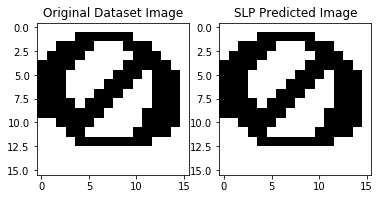

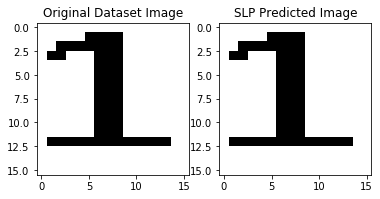

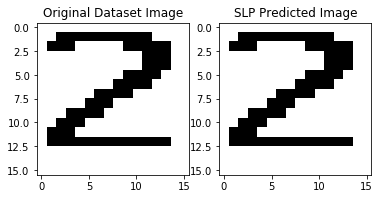

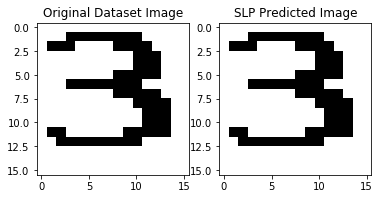

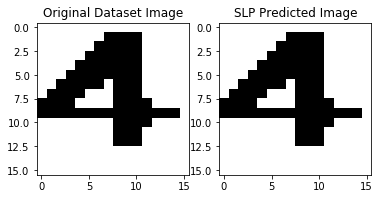

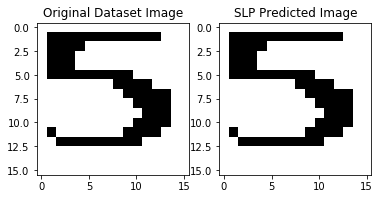

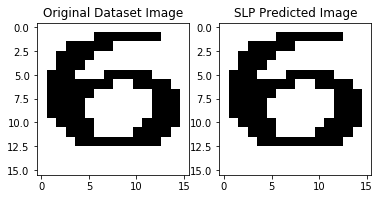

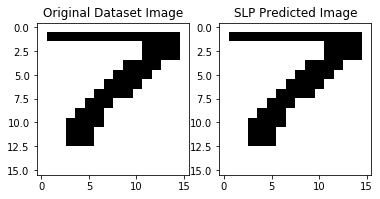

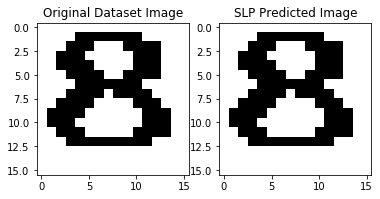

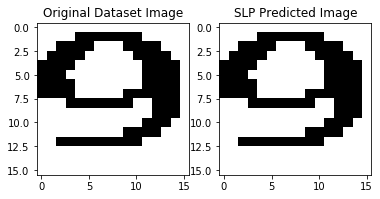

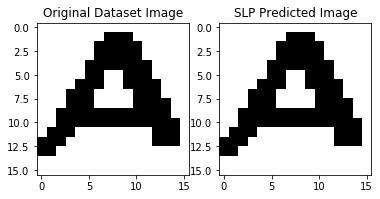

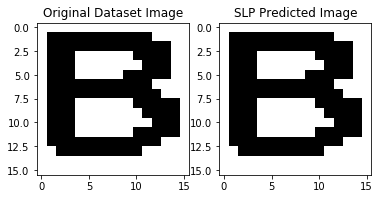

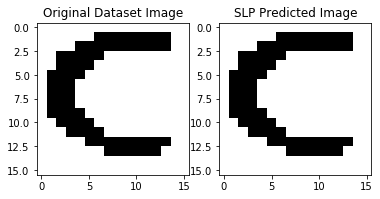

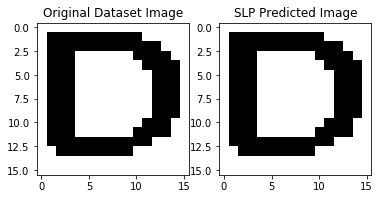

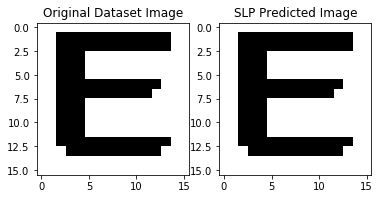

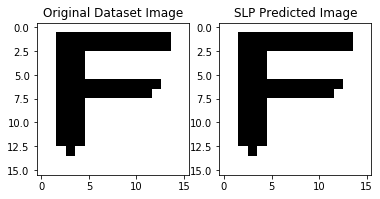

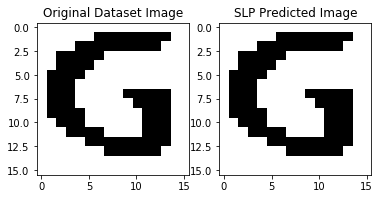

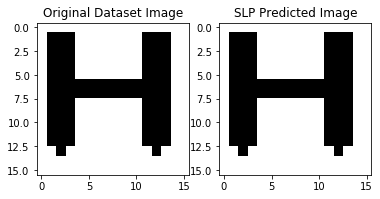

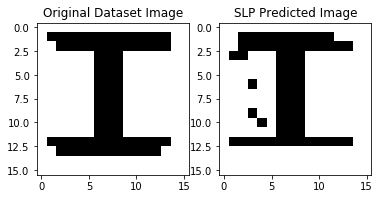

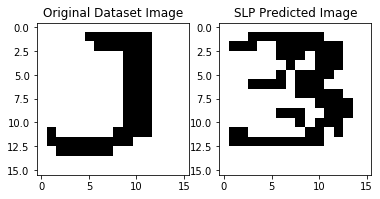

In [531]:
"""
converting the imageset into pure black and white images
the threshold value is the mean of all the pixels in the image
"""
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_test = np.where(X_test<np.mean(X_test),0,1).astype('float64')
print(X_test.shape,y_pred.shape)

compare_results(X_test,y_pred)



# Introducing noise in the images

In [211]:
def gauss_noise (image,stddev):
    """
    Add Gaussian noise to 10% of the image
    mean:0.0
    stddev:standard deviation
    """
    plt.imshow(image)
    image=np.asarray(image,dtype=float)
 # print(image)
    noise=np.random.normal(0.0,stddev,(16,16))
    out=image + noise
  #print(out)
    if out.min ()<0:
        low_clip=-1.0
    else:
        low_clip=0.0
    out=np.clip (out, low_clip, 1.0)
    out=np.uint8 (out)
 # out = np.clip(out,0,255)
 # print(out)
    plt.imshow (out,cmap="gray")
    #print(image,out)
    #print(np.intersect1d(np.asarray(image,dtype=float), out))
    return out

[[1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1]
 [0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1]
 [1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0]
 [0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0]]
[[1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0]
 [1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0

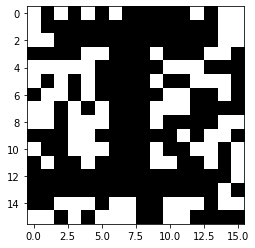

In [212]:
for idx in range(X_test.shape[0]):
    noisy_img = gauss_noise(X_test[idx].reshape(16,16),0.02)
    print(noisy_img)
    plt.imsave('../dataset/noisy/dev02/noisy_img'+str(idx)+'.jpg', noisy_img)

In [213]:
l = [l for l in os.listdir("../dataset/noisy/dev002/") if l!=".DS_Store"]
print(l,len(l))
X_test = np.array([np.array(Image.open("../dataset/noisy/dev002/"+ img)) for img in l])

['noisy_img2.jpg', 'noisy_img3.jpg', 'noisy_img1.jpg', 'noisy_img0.jpg', 'noisy_img4.jpg', 'noisy_img5.jpg', 'noisy_img7.jpg', 'noisy_img6.jpg', 'noisy_img8.jpg', 'noisy_img9.jpg'] 10


In [314]:
X_test = img_normalize("../dataset/noisy/dev1/")
X_test = X_test.reshape(X_test.shape[0],1,256)

In [315]:
y_pred = model.predict(X_test)
yp = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
xt = np.where(X_test<np.mean(X_test),0,1).astype('float64')

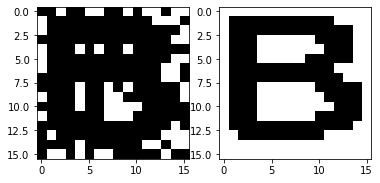

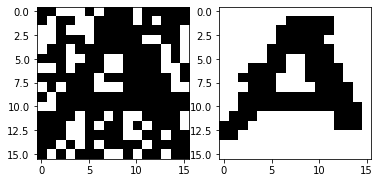

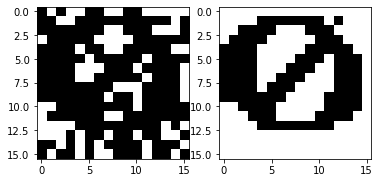

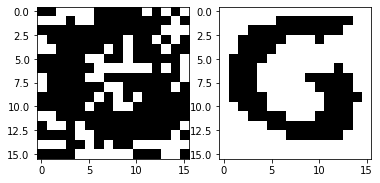

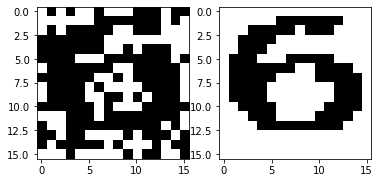

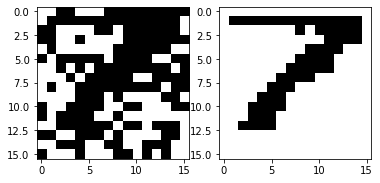

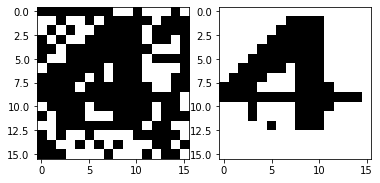

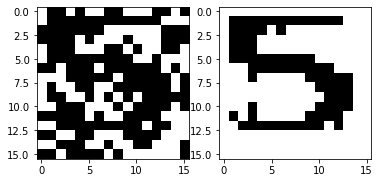

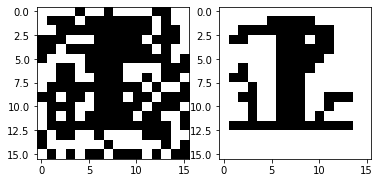

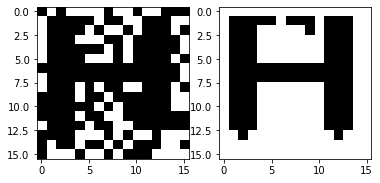

In [316]:
compare_results(xt,yp)

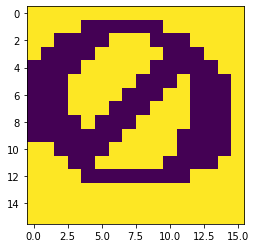

In [564]:
X_test = X_test.reshape(X_test.shape[0],16,16)
y_pred = y_pred.reshape(X_test.shape[0],16,16)
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_test = np.where(X_test<np.mean(X_test),0,1).astype('float64')
plt.imshow(X_test[0])

In [565]:
def metric_calculation(test,pred):
    """
    test: original image
    pred: predicted image
    n_inp_zeros: no. of white pixels in the original image
    n_inp_ones: no. of black pixels in the predicted image
    n_out_zeros: no. of white pixels in the original image
    n_out_ones: no. of black pixels in the predicted image
    
    ff = no. of black pixels that OCCUR in the correct position 
         corresponding to its original noiseless image/
         total no. of BLACK pixels in input image
    fha = no. of black pixels that DONOT OCCUR in the correct position 
         corresponding to its original noiseless image/
         total no. of WHITE pixels in input image
    """
    ff = []
    fha = []
    #print(pred[0])
    for i in range(test.shape[0]):
        n_inp_zeros = (test[i]==0).sum()
        n_inp_ones = (test[i]==1).sum()
        n_out_zeros = (pred[i]==0).sum()
        n_out_ones = (pred[i]==1).sum()
        ## and operation i performed to find no of black pixels that occur coorectly
        #and_op = np.logical_and(test[i],pred[i]).astype('float64')
        right_ones = (np.logical_and(test[i],pred[i]).astype('float64')==1).sum()
        #print(right_ones,n_inp_ones)
        ff.append(round(right_ones/n_inp_ones,2))
        #print("shs",ff)
        fha.append(round((n_out_ones-right_ones)/n_inp_zeros,2))
        #print(n_inp_zeros,n_inp_ones,n_out_zeros,n_out_ones)
    return ff,fha
    

In [566]:

X_test = X_test.reshape(X_test.shape[0],16,16)
y_pred = y_pred.reshape(X_test.shape[0],16,16)
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_test = np.where(X_test<np.mean(X_test),0,1).astype('float64')
fh,ffa = metric_calculation(X_test,y_pred)

In [569]:
metrics[0]=[fh,ffa]

In [576]:
xx = np.zeros([16,16],dtype="float64")